## 4. 분류

### 4.1 분류의 개요

비정형 이미지 자연어 음성...... 앙상블.. 앙상.... 웅앵....


### 4.2 결정트리

규칙을 스스로 찾아냄
오 똑똑

리프노드: 더이상 안 나눠지는 노드  
규칙노드: 나눠지는 노드? 나누는 노드???

많이 골라낼 수 있는 규칙을 찾아서 나눔. 최대한 균일한 데이터 세트를 구성할 수 있도록  

엔트로피요...? 여기서요................?  
균일한지 아닌지 계산하는거  
정보이득지수, 지니계수  

엔트로피: 혼잡도. 복잡할수록 엔트로피값이 높음  
정보이득지수: 1-엔트로피. 단순할수록 값이 높음  
~~아니 똑같은 소리 하는 걸 왜 두개를 쓰냐구여 헷갈리게ㅡㅡ~~  
지니계수 0이 평등. 낮을수록 데이터가 균일  


#### 결정트리 모델의 특징

장점: 이해하기 쉽다, 피처의 스케일링이나 정규화 등에 영향을 덜 받는다
단점: 과적합 문제 발생 (정확도 떨어짐) -> 과대적합을 방지하기 위해 하이퍼파라미터 튜닝 필요 


#### 결정트리 파라미터

min_samples_split 
min_samples_leaf 너무 나눠지면 과소적합? 너무 나눠지는걸 방지
max_features (피처가 너무 많으면) 일부 피처만 고려하여 나눌 수 있게?
max_depth 과적합 방지?! 냐하하하하
max_leaf_nodes


#### 결정트리 모델의 시각화
옹
그래프비즈 설치하면 된댜
사이킷런에 들어가있댕

https://graphviz.org/download/
윈도우용 받아서 패스 지정하는걸로??? 였나? 암튼 두번째꺼 선택해서 설치

아나콘다 프롬프트에서 conda install graphviz 

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

In [4]:
export_graphviz(dt_clf, 
                'iris.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                filled=True)

# dt_clf 디시전트리, 
# 'iris.dot' 저장될 파일명?, 
# class_names=iris.target_names 0,1,2로 나오면 뭔지 모르니께.. 꽃이름 나오게, 
# feature_names=iris.feature_names ?????????, 
# filled=True 색깔채우는거

In [5]:
import graphviz

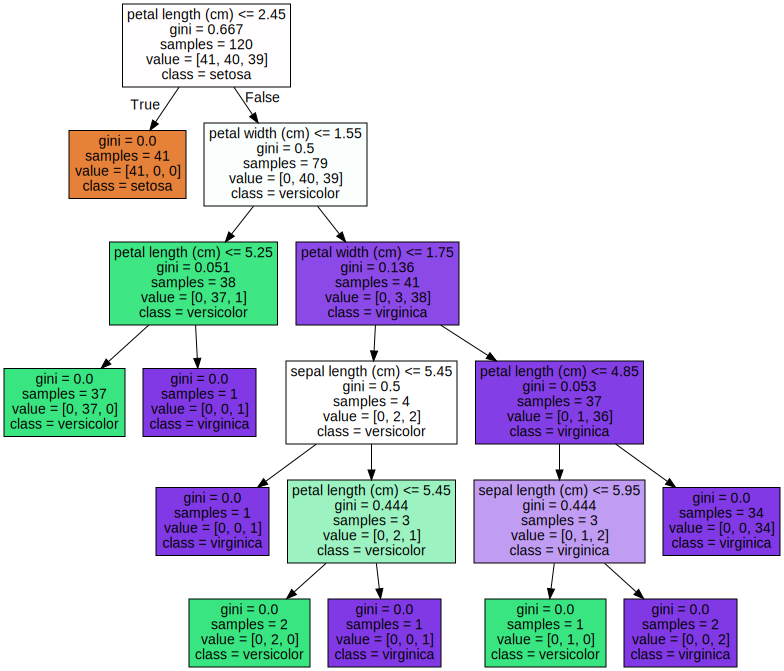

In [6]:
with open('iris.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

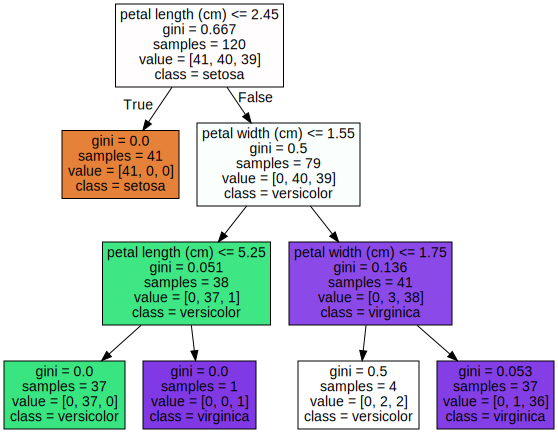

In [7]:
# max_depth 값의 변화에 따른 결정트리 변화

dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 
                'iris1.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                filled=True)

with open('iris1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

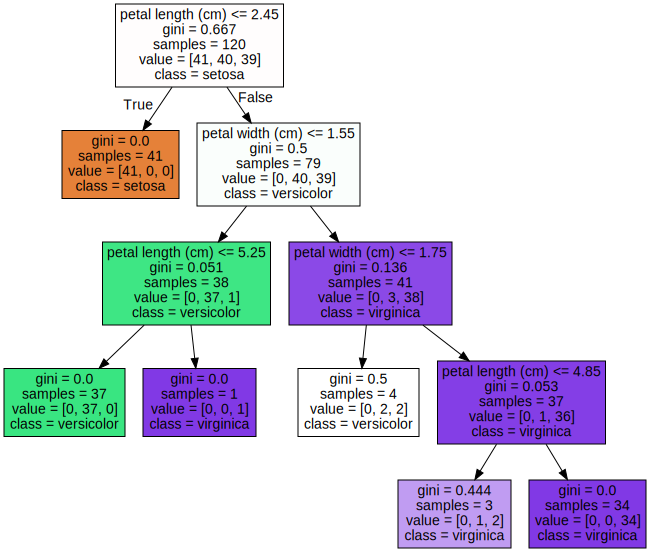

In [8]:
# min_samples_split 값의 변화에 따른 결정트리 변화

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=5)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 
                'iris1.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                filled=True)

with open('iris1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

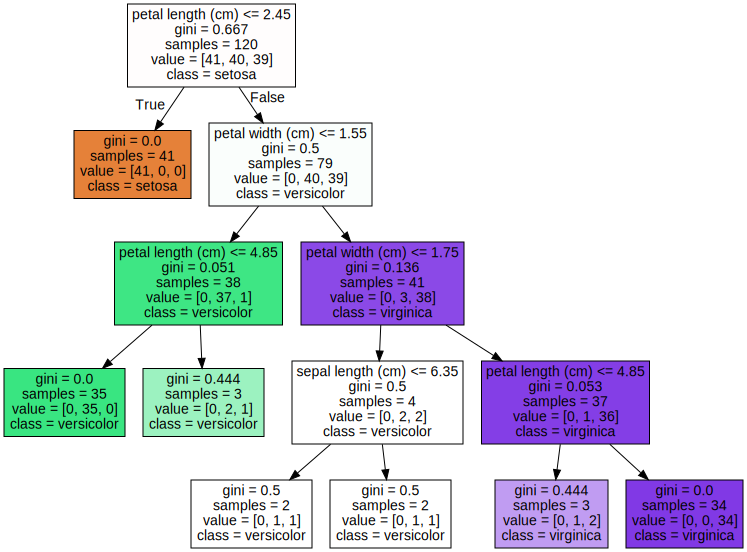

In [9]:
# min_samples_leaf 값의 변화에 따른 결정트리 변화

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=2)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 
                'iris1.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                filled=True)

with open('iris1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

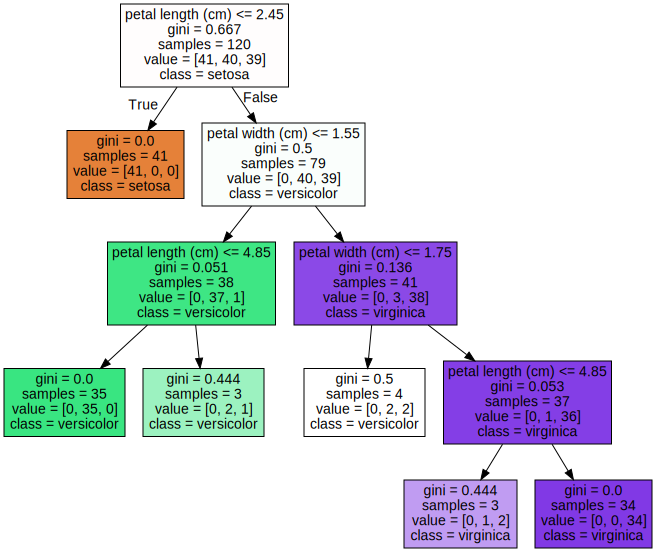

In [10]:
# max_features 값의 변화에 따른 결정트리 변화 이건 잘 모르겠답.......... ㅇㅅㅇ

dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 
                'iris1.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                filled=True)

with open('iris1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
# p.196
# 피처별로 규칙트리를 만드는 데 기여도가 다름

dt_clf.feature_importances_

# 아 마지막에 쓰인거에서..! 매번 중요도가 다르게 나옴담
# array([0.159689  , 0.01797994, 0.56123771, 0.26109336])
# array([0.02500521, 0.        , 0.55490281, 0.42009198])
# array([0.        , 0.        , 0.55387887, 0.44612113])


array([0.        , 0.        , 0.55387887, 0.44612113])

In [12]:
iris.feature_names
# dt_clf.feature_importances_ 결과가 순서대로 feature_names 임

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# p.197

import seaborn as sns

<AxesSubplot:>

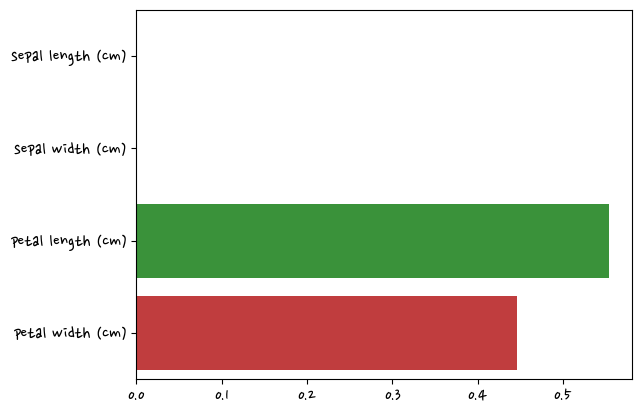

In [14]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

<AxesSubplot:>

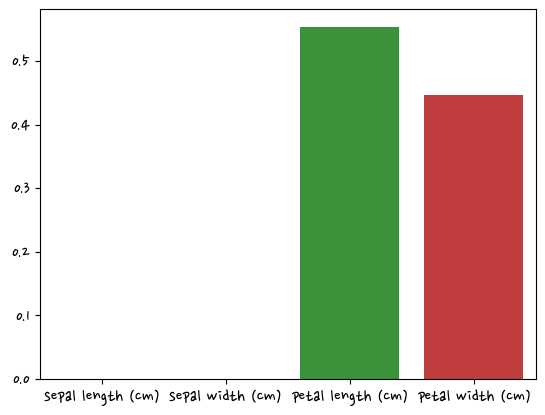

In [15]:
sns.barplot(y=dt_clf.feature_importances_, x=iris.feature_names)

In [16]:
# 타이타닉 데이터 디시전트리 시각화


타이타닉 전처리 임포트해올 수 잇게 만들기  

파이썬파일 만들기  
함수 복붙  
같은 경로상에 저장 

import func01 하고  
사용할 때 func01.transform_features(X) 일케 함수 앞에 func01. 붙여주면 됨  
우와웅


In [17]:
import func01
import pandas as pd

In [18]:
df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = func01.transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [19]:
# 타이타닉 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

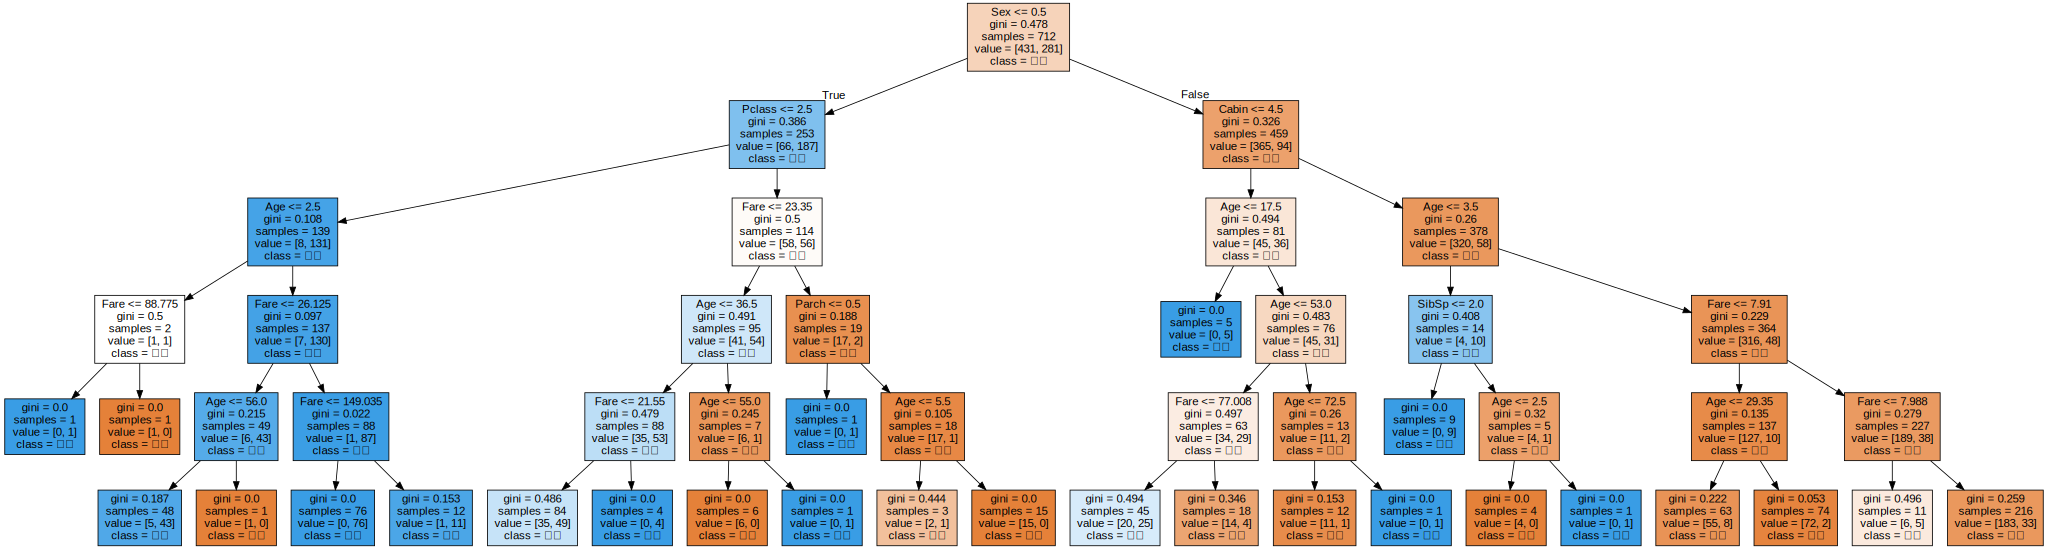

In [20]:
dt_clf = DecisionTreeClassifier(random_state=11, max_depth=5)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, 
                'titanic.dot', 
                class_names=['사망', '생존'], 
                feature_names=X_train.columns, 
                filled=True)

with open('titanic.dot', encoding='utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 결정 트리 과적합 overfitting

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [22]:
X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

In [23]:
X

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516],
       [-0.04687748,  1.35489986],
       [ 1.20888898,  0.64232637],
       [ 1.71173001, -1.04637674],
       [ 1.29670808, -0.6054158 ],
       [ 1.24188996, -0.3819388 ],
       [-1.78273822,  1.52817583],
       [-1.50514147,  1.27186707],
       [ 0.87163989, -0.42276158],
       [ 2.53026908, -1.61974843],
       [ 0.95000368,  1.83240861],
       [-1.53716448, -0.89497353],
       [-2.13650855,  2.73389996],
       [ 1.01037788,  0.59402713],
       [ 1.9876467 , -0.22375521],
       [ 1.12463497,  2.13646176],
       [-0.65122279,  0.97865617],
       [ 0.85144036,  0.42548085],
       [-0.10789457, -0.65942376],
       [-0.41699944,

In [24]:
y

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

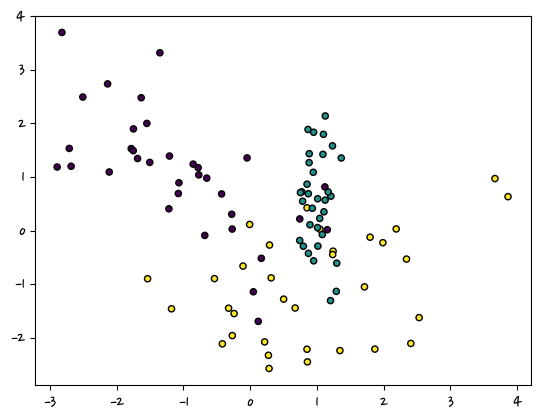

In [25]:
plt.rcParams['axes.unicode_minus']=False # 숫자 마이너스 깨져서 나올 때 붙여죠
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)


In [26]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X, y)

C:\pythonDir\05_machine_learning\func01.py:59: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


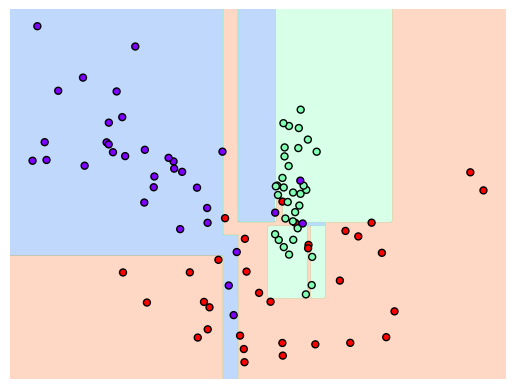

In [27]:
func01.visualize_boundary(dt_clf, X, y)

C:\pythonDir\05_machine_learning\func01.py:59: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


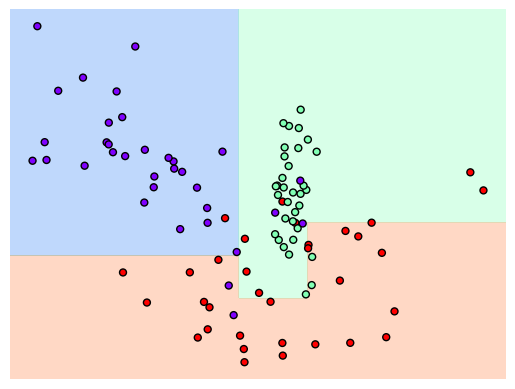

In [28]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=6).fit(X, y)
func01.visualize_boundary(dt_clf, X, y)